In [1]:
import pandas as pd
from sklearn.metrics import roc_auc_score
import numpy as np
import seaborn as sns
import matplotlib
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
import copy
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

## Data Exploration


In [2]:
data = pd.read_csv("SimpleDataSetWithNewTarget.csv")
data.head()

artist_familiarity  artist_hotttnesss           artist_id  artist_latitude  \
0            0.780462           0.574275  ARMQHX71187B9890D3              NaN   
1            0.581794           0.401998  ARD7TVE1187B99BFB1              NaN   
2            0.630630           0.417500  ARMJAGH1187FB546F3         35.14968   
3            0.487357           0.343428  ARKRRTF1187B9984DA              NaN   
4            0.630382           0.454231  AR7G5I41187FB4CE6C              NaN   

   artist_location  artist_longitude       artist_name   duration  \
0      Atlanta, GA               NaN          Mastodon  280.21506   
1  California - LA               NaN            Casual  218.93179   
2      Memphis, TN         -90.04892      The Box Tops  148.03546   
3              NaN               NaN  Sonora Santanera  177.47546   
4  London, England               NaN          Adam Ant  233.40363   

   end_of_fade_in  key  ...    mode_confidence  \
0           0.238    5  ...              0.500   
1           0.247    1  ...              0.636   
2           0.148    6  ...              0.430   
3           0.282    8  ...              0.565   
4           0.000    0  ...              0.749   

                               release  song_hotttnesss  start_of_fade_out  \
0                 Call of the Mastodon         0.597641            275.528   
1                          Fear Itself         0.602120            218.932   
2                           Dimensions              NaN            137.915   
3  Las Numero 1 De La Sonora Santanera              NaN            172.304   
4                        Friend Or Foe              NaN            217.124   

     tempo  time_signature  time_signature_confidence              title  \
0  173.205               5                      0.120  Deep Sea Creature   
1   92.198               4                      0.778   I Didn't Mean To   
2  121.274               4                      0.384          Soul Deep   
3  100.070               1                      0.000    Amor De Cabaret   
4  119.293               4                      0.000    Something Girls   

   year  bbhot  
0  2001      0  
1     0      0  
2  1969      1  
3     0      0  
4  1982      0  

[5 rows x 23 columns]

In [3]:
#Encode artist id into quantitative
le = preprocessing.LabelEncoder()
data['artist_id'] = le.fit_transform(data['artist_id'].astype('str'))

In [9]:
#graph distribution of an attribute of songs that are hot
def freq(col):
   g = sns.kdeplot(data[col][(data["bbhot"] == 1)], color="Blue", shade = True)
   g.set_xlabel(col)
   g.set_ylabel("Frequency")
   g = g.legend(["1"])
   plt.show()

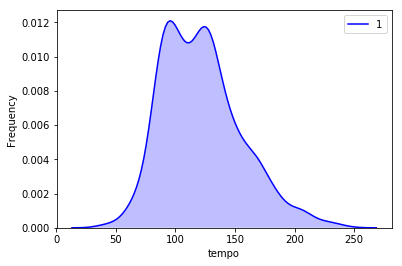

In [10]:
freq("tempo")

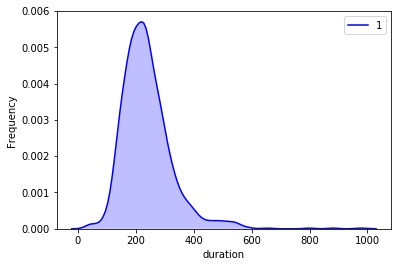

In [11]:
freq("duration")

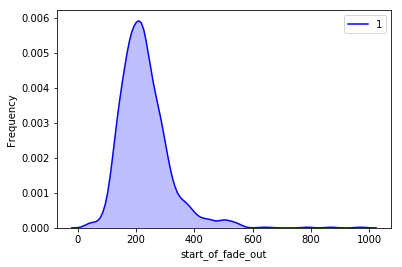

In [12]:
freq("start_of_fade_out")

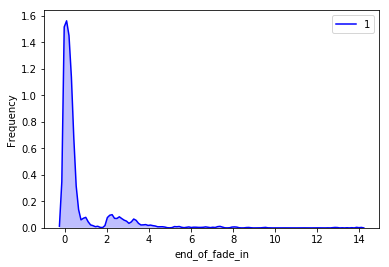

In [13]:
freq("end_of_fade_in")

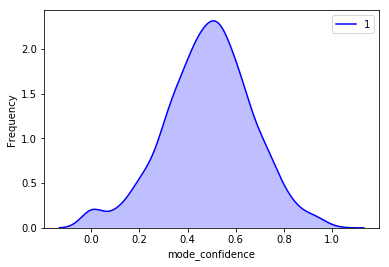

In [14]:
freq("mode_confidence")

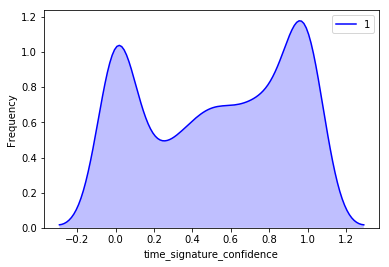

In [15]:
freq("time_signature_confidence")

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 23 columns):
artist_familiarity           9997 non-null float64
artist_hotttnesss            10001 non-null float64
artist_id                    10001 non-null int64
artist_latitude              3742 non-null float64
artist_location              5709 non-null object
artist_longitude             3742 non-null float64
artist_name                  10001 non-null object
duration                     10001 non-null float64
end_of_fade_in               10001 non-null float64
key                          10001 non-null int64
key_confidence               10001 non-null float64
loudness                     10001 non-null float64
mode                         10001 non-null int64
mode_confidence              10001 non-null float64
release                      10001 non-null object
song_hotttnesss              5649 non-null float64
start_of_fade_out            10001 non-null float64
tempo                

In [4]:
drop_list = ['artist_location', 'artist_latitude', 'artist_longitude','artist_name', 'release', 'title' ,'song_hotttnesss']
train = data.drop(drop_list, axis=1)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 16 columns):
artist_familiarity           9997 non-null float64
artist_hotttnesss            10001 non-null float64
artist_id                    10001 non-null int64
duration                     10001 non-null float64
end_of_fade_in               10001 non-null float64
key                          10001 non-null int64
key_confidence               10001 non-null float64
loudness                     10001 non-null float64
mode                         10001 non-null int64
mode_confidence              10001 non-null float64
start_of_fade_out            10001 non-null float64
tempo                        10001 non-null float64
time_signature               10001 non-null int64
time_signature_confidence    10001 non-null float64
year                         10001 non-null int64
bbhot                        10001 non-null int64
dtypes: float64(10), int64(6)
memory usage: 1.2 MB


In [6]:
Y = copy.deepcopy(train.bbhot)
Y.shape

(10001,)

In [7]:
train["artist_familiarity"] = train["artist_familiarity"].fillna(train["artist_familiarity"].median())

In [8]:
train1 = train.drop("bbhot", axis=1)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(train1, Y, test_size=0.33, random_state=7)
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 87.85%


In [9]:
#Function to evaluate my model with Cross validation
from sklearn.model_selection import cross_val_score
def testingModel(model, X_train, Y_train):
    scores = cross_val_score(model, X_train, Y_train, cv=10, scoring = "roc_auc")
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())
    return scores.mean()

In [10]:
#61%
rf = RandomForestClassifier(n_estimators=100, oob_score = True)
rf.fit(train1, Y)
acc_random_forest = testingModel(rf, train1, Y)

Scores: [ 0.61076428  0.62639992  0.62743349  0.66300709  0.63138241  0.61367907
  0.56595351  0.59271359  0.60628678  0.57860963]
Mean: 0.611622977021
Standard Deviation: 0.0265813445285


In [11]:
#63%
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=100,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb1.fit(train1, Y)
acc_xgb = testingModel(xgb1, train1, Y)

Scores: [ 0.61899357  0.63935868  0.6591631   0.66604031  0.611862    0.67522582
  0.59946203  0.59170728  0.63769208  0.62461803]
Mean: 0.632412290476
Standard Deviation: 0.02676064386


In [13]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(train1, Y)

acc_log = testingModel(logreg, train1, Y)

Scores: [ 0.58188611  0.624423    0.64767882  0.65642557  0.60638694  0.65019697
  0.58886483  0.6195309   0.57863009  0.61714095]
Mean: 0.617116417974
Standard Deviation: 0.026960071908


In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(train1, Y)

acc_knn = testingModel(knn, train1, Y)

Scores: [ 0.51177639  0.59330306  0.53027022  0.50722536  0.54007574  0.5620046
  0.53808697  0.56188537  0.53357529  0.5486631 ]
Mean: 0.542686610812
Standard Deviation: 0.0241197399644


In [16]:
from sklearn.svm import SVC, LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(train1, Y)

acc_linear_svc = testingModel(linear_svc, train1, Y)

Scores: [ 0.49802308  0.58885736  0.56909165  0.48250174  0.47540515  0.62875457
  0.48459066  0.52271578  0.44768645  0.42871467]
Mean: 0.512634110759
Standard Deviation: 0.0609406125152


In [18]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train1, Y)

acc_decision_tree = testingModel(decision_tree, train1, Y)

Scores: [ 0.5137202   0.52015702  0.51126966  0.50957659  0.54080066  0.53954635
  0.51172751  0.53307452  0.51025382  0.5122183 ]
Mean: 0.520234462503
Standard Deviation: 0.0119725710081


In [20]:
from sklearn import linear_model
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
acc_sgd = testingModel(sgd, train1, Y)  

Scores: [ 0.54344495  0.53753311  0.59780234  0.42577667  0.47331623  0.40566011
  0.42131268  0.56578182  0.41832715  0.3783518 ]
Mean: 0.47673068438
Standard Deviation: 0.0738618373643


In [23]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'XGB', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_xgb, 
             acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(7)

Model
Score                            
0.632412                      XGB
0.617116      Logistic Regression
0.611623            Random Forest
0.542687                      KNN
0.520234            Decision Tree
0.512634  Support Vector Machines

In [28]:
params = {'min_child_weight':[4,5], 'gamma':[i/10.0 for i in range(3,6)],  'subsample':[i/10.0 for i in range(6,11)],
'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4]}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=500, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27, n_threads=-1), 
 param_grid = params, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train1,Y)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

C:\Users\phucd\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.62340, std: 0.01655, params: {'colsample_bytree': 0.6, 'gamma': 0.3, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.6},
  mean: 0.62614, std: 0.01693, params: {'colsample_bytree': 0.6, 'gamma': 0.3, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.7},
  mean: 0.63621, std: 0.01855, params: {'colsample_bytree': 0.6, 'gamma': 0.3, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.8},
  mean: 0.63075, std: 0.01691, params: {'colsample_bytree': 0.6, 'gamma': 0.3, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.9},
  mean: 0.63782, std: 0.01729, params: {'colsample_bytree': 0.6, 'gamma': 0.3, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 1.0},
  mean: 0.62542, std: 0.01568, params: {'colsample_bytree': 0.6, 'gamma': 0.3, 'max_depth': 2, 'min_child_weight': 5, 'subsample': 0.6},
  mean: 0.62777, std: 0.01915, params: {'colsample_bytree': 0.6, 'gamma': 0.3, 'max_depth': 2, 'min_child_weight': 5, 'subsample': 0.7},
  mean: 0.63313, std: 0.01993, params: {'